In [299]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
%matplotlib inline

# Reading the data

In [300]:
train = pd.read_csv("aug_train.csv")

# Exploring the data

In [301]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [302]:
train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [303]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [304]:
train.shape

(19158, 14)

**(target: 0) => 75% et (target: 1) => 25%**

In [305]:
train.target.value_counts(normalize=True)

0.0    0.750652
1.0    0.249348
Name: target, dtype: float64

**Les personnes qui n\'ont pas de diplome universitaire sont plus susceptible à changer de travail**

In [306]:
pd.pivot_table(train, values='target', columns=['enrolled_university'], aggfunc=np.sum).T.sort_values('target', ascending=False)
# enrollement_cond = {'no_enrollment': 0, 'Full time course': 1, 'Part time course': 2}

,target
enrolled_university,
no_enrollment,2921.0
Full time course,1431.0
Part time course,302.0


In [307]:
pd.pivot_table(train, values='target', columns=['relevent_experience'], aggfunc=np.sum).T.sort_values('target', ascending=False)
# relevent_cond = {'Has relevent experience': 0, 'No relevent experience': 1}

,target
relevent_experience,
Has relevent experience,2961.0
No relevent experience,1816.0


In [308]:
pd.pivot_table(train, values='target', columns=['education_level'], aggfunc=np.sum).T.sort_values('target', ascending=False)
# education_cond = {'Graduate': 0, 'Masters': 1, 'High School': 2, 'Phd': 3, 'Primary School': 4}

,target
education_level,
Graduate,3245.0
Masters,935.0
High School,394.0
Phd,58.0
Primary School,41.0


In [309]:
pd.pivot_table(train, values='target', columns=['company_type'], aggfunc=np.sum).T.sort_values('target', ascending=False)
# companyT_cond = {'Pvt Ltd': 0, 'Public Sector': 1, 'Early Stage Startup': 2, 'Funded Startup': 3, 'NGO': 4, 'Other': 5}

,target
company_type,
Pvt Ltd,1775.0
Public Sector,210.0
Early Stage Startup,142.0
Funded Startup,140.0
NGO,97.0
Other,29.0


In [310]:
pd.pivot_table(train, values='target', columns=['experience'], aggfunc=np.sum).T.sort_values('target', ascending=False)

,target
experience,
>20,503.0
3,478.0
4,457.0
5,412.0
2,374.0
6,343.0
7,303.0
<1,237.0
1,233.0


In [311]:
type(train["experience"][0])

str

In [312]:
pd.pivot_table(train, values='target', columns=['major_discipline'], aggfunc=np.sum).T.sort_values('target', ascending=False)
# major_cond = {'STEM': 0, 'Humanities': 1, 'Other': 2, 'Business Degree': 3, 'No Major': 4, 'Arts': 5}

,target
major_discipline,
STEM,3791.0
Humanities,141.0
Other,102.0
Business Degree,86.0
No Major,55.0
Arts,53.0


In [313]:
pd.pivot_table(train, values='target', columns=['company_size'], aggfunc=np.sum).T.sort_values('target', ascending=False)

,target
company_size,
50-99,545.0
100-500,415.0
10000+,385.0
10/49,344.0
<10,224.0
1000-4999,200.0
500-999,152.0
5000-9999,102.0


In [314]:
pd.pivot_table(train, values='target', columns=['gender'], aggfunc=np.sum).T.sort_values('target', ascending=False)
# gender_cond = {'Male': 0, 'Female': 1, 'Other': 2}

,target
gender,
Male,3012.0
Female,326.0
Other,50.0


In [315]:
pd.pivot_table(train, values='target', columns=['last_new_job'], aggfunc=np.sum).T.sort_values('target', ascending=False)

,target
last_new_job,
1,2125.0
never,739.0
2,700.0
>4,600.0
3,231.0
4,228.0


In [316]:
train.gender.value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [317]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

### vue que le nombre de null est enorme on va les laisser :/

# Data viz

In [318]:
corr = train.corr()

<AxesSubplot:>

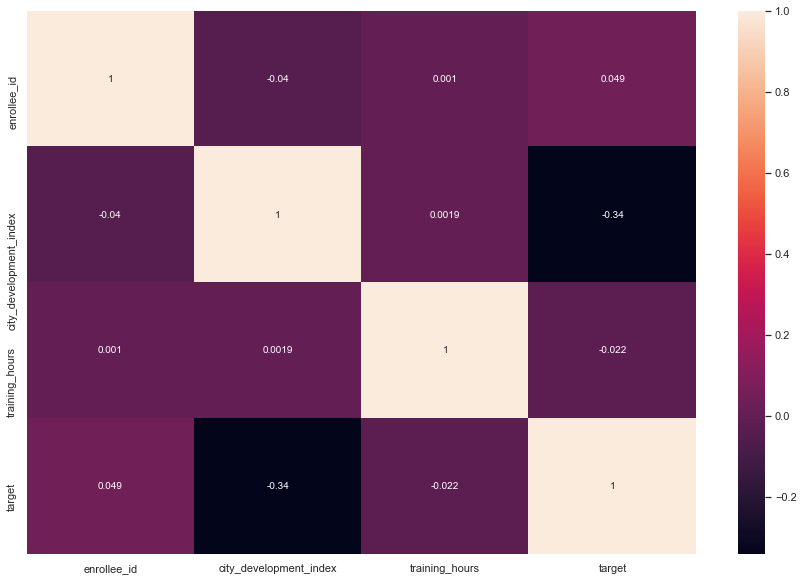

In [319]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

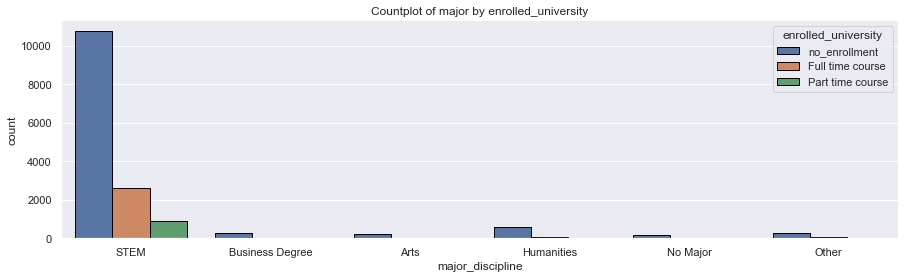

In [320]:
plt.figure(figsize=[15,4])
sns.countplot(x='major_discipline', hue='enrolled_university',edgecolor="black", alpha=1, data=train)
sns.despine()
plt.title("Countplot of major by enrolled_university")
plt.show()

([<matplotlib.patches.Wedge at 0x1caa9ca60d0>,
 [Text(-1.048755143841177, 0.3318322592314862, 'Male'),
  Text(1.0342879850246178, -0.37449748201251787, 'Female'),
  Text(1.0990774479951975, -0.04504179512812524, 'Other')],
 [Text(-0.5720482602770056, 0.1809994141262652, '90.25'),
  Text(0.5641570827407006, -0.20427135382500972, '8.45'),
  Text(0.5994967898155622, -0.02456825188806831, '1.30')])

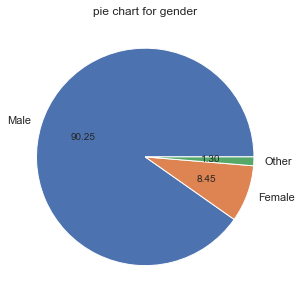

In [321]:
plt.figure(figsize=(5,5))
plt.title("pie chart for gender")
plt.pie(x=train.gender.value_counts().values, labels=train.gender.value_counts().index, autopct='%.2f')

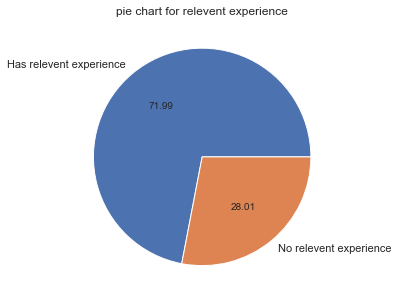

In [322]:
plt.figure(figsize=(5,5))
plt.title("pie chart for relevent experience")
plt.pie(x=train.relevent_experience.value_counts().values, labels=train.relevent_experience.value_counts().index, autopct='%.2f')
plt.show()

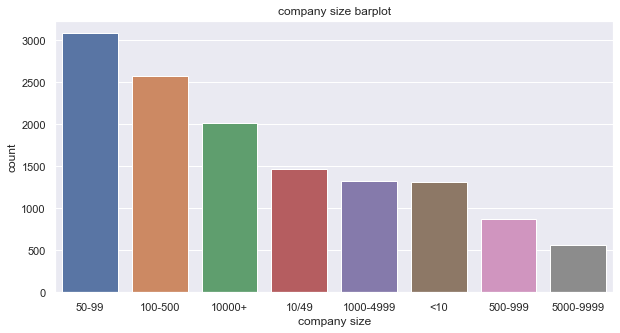

In [323]:
plt.figure(figsize=(10, 5))
sns.barplot(x=train.company_size.value_counts().index, y=train.company_size.value_counts().values)
plt.title("company size barplot")
plt.xlabel("company size")
plt.ylabel("count")
plt.show()

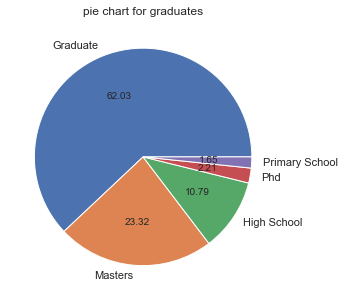

In [324]:
plt.figure(figsize=(5,5))
plt.title("pie chart for graduates")
plt.pie(x=train.education_level.value_counts().values, labels=train.education_level.value_counts().index, autopct='%.2f')
plt.show()

# Feature Engeneereing

In [325]:
from sklearn.preprocessing import LabelEncoder

In [326]:
le = LabelEncoder()

## les conditions de transformation 

In [327]:
enrollement_cond = {'no_enrollment': 0, 'Full time course': 1, 'Part time course': 2}
relevent_cond = {'Has relevent experience': 0, 'No relevent experience': 1}
education_cond = {'Graduate': 0, 'Masters': 1, 'High School': 2, 'Phd': 3, 'Primary School': 4}
companyT_cond = {'Pvt Ltd': 0, 'Public Sector': 1, 'Early Stage Startup': 2, 'Funded Startup': 3, 'NGO': 4, 'Other': 5}
major_cond = {'STEM': 0, 'Humanities': 1, 'Other': 2, 'Business Degree': 3, 'No Major': 4, 'Arts': 5}
gender_cond = {'Male': 0, 'Female': 1, 'Other': 2}
last_cond = {'never': 0, '1': 1, '2': 2, '3': 3, '4': 4, '>4': 5}
experience_cond = {">20": 0, "<1": 1, "1": 2, "2": 3, "3": 4, "4": 5, "5": 6, "6": 7, "7": 8, "8": 9, "9": 10, "10": 11, "11": 12, "12": 13, "13": 14, "14": 15, "15": 16, "16": 17, "17": 18, "18": 19, "19": 20, "20": 21}
def city_cond(x):
    return 'NaN' if len(x.split("_")) < 2 else float(x.split("_")[1])
def dev_index(x):
    return x*100
companyS_cond = {"50-99": 0, "100-500": 1, "10000+": 2, "10/49": 3, "<10": 4, "1000-4999": 5, "500-999": 6, "5000-9999": 7}

In [328]:
train = pd.read_csv("aug_train.csv")

train['gender'].replace(gender_cond, inplace=True)
train['relevent_experience'].replace(relevent_cond, inplace=True)
train['education_level'].replace(education_cond, inplace=True)
train['enrolled_university'].replace(enrollement_cond, inplace=True)
train['major_discipline'].replace(major_cond, inplace=True)
train['company_type'].replace(companyT_cond, inplace=True)
train['last_new_job'].replace(last_cond, inplace=True)
train['city'] = train['city'].apply(city_cond)
train['experience'].replace(experience_cond, inplace=True)
train['company_size'].replace(companyS_cond, inplace=True)
train['city_development_index'] = train['city_development_index'].apply(dev_index)

In [329]:
train.dtypes

enrollee_id                 int64
city                      float64
city_development_index    float64
gender                    float64
relevent_experience         int64
enrolled_university       float64
education_level           float64
major_discipline          float64
experience                float64
company_size              float64
company_type              float64
last_new_job              float64
training_hours              int64
target                    float64
dtype: object

In [330]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103.0,92.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,36,1.0
1,29725,40.0,77.6,0.0,1,0.0,0.0,0.0,16.0,0.0,0.0,5.0,47,0.0
2,11561,21.0,62.4,NaN,1,1.0,0.0,0.0,6.0,NaN,NaN,0.0,83,0.0
3,33241,115.0,78.9,NaN,1,NaN,0.0,3.0,1.0,NaN,0.0,0.0,52,1.0
4,666,162.0,76.7,0.0,0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173.0,87.8,0.0,1,0.0,0.0,1.0,15.0,NaN,NaN,1.0,42,1.0
19154,31398,103.0,92.0,0.0,0,0.0,0.0,0.0,15.0,NaN,NaN,4.0,52,1.0
19155,24576,103.0,92.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,44,0.0
19156,5756,65.0,80.2,0.0,0,0.0,2.0,NaN,1.0,6.0,0.0,2.0,97,0.0


In [331]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [332]:
# Remplacement des NaN avec la median de chaque colonne
train['gender'] = train['gender'].fillna((train['gender'].median()))
train['enrolled_university'] = train['enrolled_university'].fillna((train['enrolled_university'].median()))
train['education_level'] = train['education_level'].fillna((train['education_level'].median()))
train['major_discipline'] = train['major_discipline'].fillna((train['major_discipline'].median()))
train['experience'] = train['experience'].fillna((train['experience'].median()))
train['company_size'] = train['company_size'].fillna((train['company_size'].median()))
train['company_type'] = train['company_type'].fillna((train['company_type'].median()))
train['last_new_job'] = train['last_new_job'].fillna((train['last_new_job'].median()))
train = train.astype(int)

<AxesSubplot:>

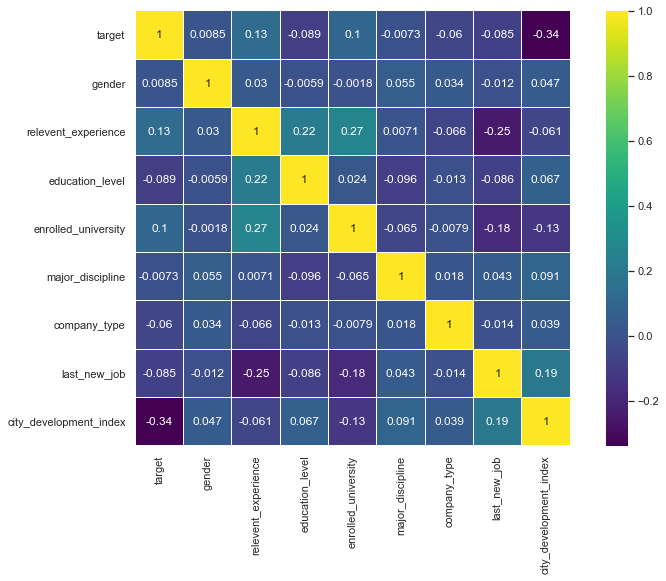

In [333]:
corr = train[['target', 'gender', 'relevent_experience', 'education_level', 'enrolled_university', 'major_discipline', 'company_type', 'last_new_job', 'city_development_index']].corr()
sns.set(font_scale=1)
plt.figure(figsize=(13, 8))
sns.heatmap(corr, linewidths=0.1, square=True, annot=True, cmap='viridis', linecolor="white")

In [334]:
train.set_index('enrollee_id',inplace=True)
X = train.drop("target", axis=1)
y = train['target']

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.33)

In [336]:
X_train.dtypes

city                      int32
city_development_index    int32
gender                    int32
relevent_experience       int32
enrolled_university       int32
education_level           int32
major_discipline          int32
experience                int32
company_size              int32
company_type              int32
last_new_job              int32
training_hours            int32
dtype: object

# KNN

In [337]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=66, n_jobs=1, p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=1, n_neighbors=66)

In [338]:
predictions = knn.predict(X_test)

In [339]:
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(y_test, predictions)
acc = accuracy.diagonal().sum()/accuracy.sum()
err = 1 - acc
print ('errors : ', err*100)

errors :  22.48932468764827


In [340]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predictions)

print(acc_score)

0.7751067531235173


In [341]:
errors = []
neighbors = range(2, 101)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=1)
    knn.fit(X_train, y_train)
    err = round((1.0 - knn.score(X_test, y_test))*100, 3)
    errors.append(err)

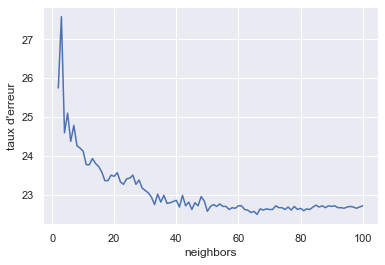

In [342]:
plt.plot(neighbors, errors, 'b')
plt.xlabel('neighbors')
plt.ylabel("taux d'erreur")
plt.show()

# SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svc = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=42, degree=4))
svc.fit(X_train, y_train)

pred = svc.predict(X_test)

acc_score = accuracy_score(y_test, pred)

print(acc_score)

# Decision tree

In [ ]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(max_depth=4,random_state=1)
dt = dt.fit(X_train, y_train)

pred = dt.predict(X_test)

acc_score = accuracy_score(y_test, pred)

print(acc_score)

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=7, n_jobs=1)
rf = rf.fit(X_train, y_train)

pred = rf.predict(X_test)

acc_score = accuracy_score(y_test, pred)

print(acc_score)

# Testing

In [ ]:
test_with = [[21,62,0,1,1,2,0,7,2,0,4,188]]
columns=['city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours']
ledataframe = pd.DataFrame(test_with ,columns=columns)
clf.predict(ledataframe)

In [ ]:
do = train[train.target == 1].sample()

In [ ]:
knn.predict(do.drop("target", axis=1))

In [ ]:
do.drop("target", axis=1)

# Exporting trained AI s

In [ ]:
from joblib import dump

In [ ]:
dump(rf, "rf.pk1")
dump(dt, "dt.pk1")
dump(svc, "svc.pk1")